In [1]:
# Run in python console
import nltk; nltk.download('stopwords')

# Run in terminal or command prompt
#!python3 -m spacy download en

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sumairaafzal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [4]:
# spacy for lemmatization
import spacy
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import SnowballStemmer
import string

In [5]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # this is mandatory
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)


In [7]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [8]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [9]:
# Import Dataset
df = pd.read_csv('Bert-560.csv')
#print(df.target_names.unique())
df.head(40)

,paragraph
0,"In recent years, deep pre-training approaches ..."
1,"In this paper, we address these challenges by ..."
2,Transformer-based Autoencoder: One of the key ...
3,The autoregressive loss belongs to a large fam...
4,The following recent work is aimed towards a b...
5,We first discuss empirical results for speedin...
6,"Recently, several pre-trained transformers suc..."
7,"Model Architectures of BERT, GPT and ELMo Quot..."
8,We featurize each catalog item i by embedding ...
9,Neural network approaches have achieved great ...


In [10]:


def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

df['paragraph'] = df['paragraph'].map(lambda x: clean_text(x))


In [11]:
df['paragraph']


#print(df[:1])

0      recent year deep pre - train approach <ref bro...
1      paper address challeng propos two novel approa...
2      transform - base autoencod : one key point mod...
3      autoregress loss belong larg famili selfsuperv...
4      follow recent work aim toward better understan...
5      first discuss empir result speed bert pre - tr...
6      recent sever pre - train transform gpt <ref be...
7      model architectur bert gpt elmo quot <ref bert...
8      featur catalog item embed vector space seeker ...
9      neural network approach achiev great success s...
10     graph neural network gnn : gnn use build relat...
11     motiv desir address limit supervis pars succes...
12     pre - train sentenc encod elmo <ref bert rapid...
13     argu relat point critic repres point cloud : s...
14     meanwhil recent progress train deep contextu l...
15     propos curriculum - base transfer learn approa...
16     artetx schwenk 2018 present languag agnost sen...
17     right end : proud perfor

In [12]:
#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

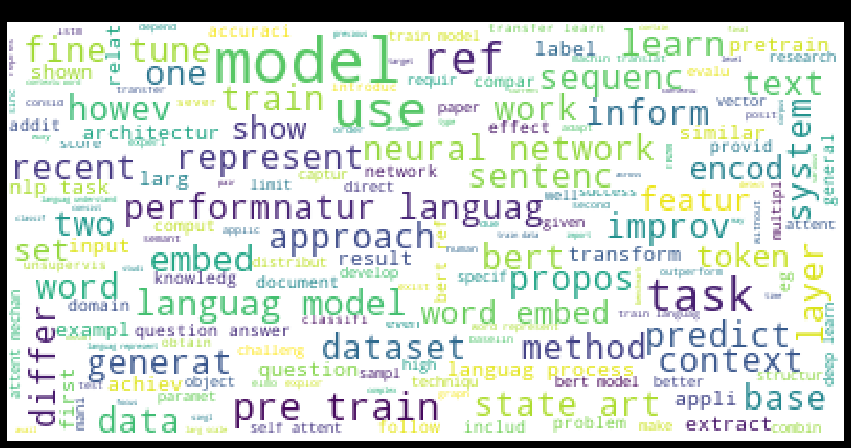

In [13]:
def wordcloud(df,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
                          background_color="white",
                          stopwords=stopwords,
                          max_words=800,
                          max_font_size=30, 
                          random_state=42).generate(" ".join([i for i in df['paragraph']]))
    
    plt.figure( figsize=(15,15), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Paper Analysis")
wordcloud(df,'paragraph')  

Tokenize words and Clean-up text

In [14]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

paragraph_words = list(sent_to_words(df['paragraph']))

print(paragraph_words)

[['recent', 'year', 'deep', 'pre', 'train', 'approach', 'ref', 'brought', 'great', 'break', 'through', 'nlp', 'task', 'question', 'answer', 'system', 'also', 'show', 'promis', 'result', 'like', 'qna', 'relev', 'mrc', 'task', 'etc', 'howev', 'due', 'sheer', 'amount', 'paramet', 'model', 'infer', 'time', 'consum', 'even', 'power', 'gpu', 'machin', 'speed', 'still', 'limit', 'shown', 'commerci', 'question', 'answer', 'system', 'two', 'approach', 'adopt', 'model', 'infer', 'head', 'bodi', 'queri', 'larg', 'scale', 'batchmod', 'process', 'use', 'comput', 'answer', 'offlin', 'part', 'number', 'qna', 'pair', 'magnitud', 'billion', 'ii', 'tail', 'queri', 'onlin', 'infer', 'use', 'latenc', 'requir', 'ms', 'approach', 'requir', 'fast', 'model', 'infer', 'speed', 'therefor', 'perform', 'model', 'compress', 'infer', 'speedup'], ['paper', 'address', 'challeng', 'propos', 'two', 'novel', 'approach', 'pre', 'train', 'documentlevel', 'hierarch', 'represent', 'method', 'pre', 'train', 'represent', 'unl

In [15]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(paragraph_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[paragraph_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[paragraph_words[0]]])

/Users/sumairaafzal/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['recent', 'year', 'deep', 'pre', 'train', 'approach', 'ref', 'brought', 'great', 'break', 'through', 'nlp', 'task', 'question', 'answer', 'system', 'also', 'show', 'promis', 'result', 'like', 'qna', 'relev', 'mrc', 'task', 'etc', 'howev', 'due', 'sheer', 'amount', 'paramet', 'model', 'infer', 'time', 'consum', 'even', 'power', 'gpu', 'machin', 'speed', 'still', 'limit', 'shown', 'commerci', 'question', 'answer', 'system', 'two', 'approach', 'adopt', 'model', 'infer', 'head', 'bodi', 'queri', 'larg', 'scale', 'batchmod', 'process', 'use', 'comput', 'answer', 'offlin', 'part', 'number', 'qna', 'pair', 'magnitud', 'billion', 'ii', 'tail', 'queri', 'onlin', 'infer', 'use', 'latenc', 'requir', 'ms', 'approach', 'requir', 'fast', 'model', 'infer', 'speed', 'therefor', 'perform', 'model', 'compress', 'infer', 'speedup']


In [16]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
# Form Bigrams
data_words_bigrams = make_bigrams(paragraph_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['recent', 'year', 'deep', 'pre', 'train', 'approach', 'ref', 'bring', 'great', 'break', 'nlp', 'task', 'question', 'answer', 'system', 'also', 'show', 'promis', 'result', 'qna', 'relev', 'mrc', 'task', 'howev', 'due', 'sheer', 'amount', 'paramet', 'model', 'infer', 'time', 'consum', 'even', 'power', 'gpu', 'machin', 'speed', 'still', 'limit', 'show', 'commerci', 'question', 'answer', 'system', 'approach', 'adopt', 'model', 'infer', 'head', 'bodi', 'queri', 'larg', 'scale', 'batchmod', 'process', 'use', 'comput', 'answer', 'offlin', 'part', 'number', 'qna', 'pair', 'magnitud', 'tail', 'queri', 'onlin', 'infer', 'use', 'latenc', 'requir', 'ms', 'approach', 'requir', 'fast', 'model', 'infer', 'speed', 'therefor', 'perform', 'model', 'compress', 'infer', 'speedup']]


In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 5), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 4), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 2), (44, 2), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 2), (53, 2), (54, 1), (55, 1), (56, 2), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1)]]


In [19]:
id2word[0]

'adopt'

In [20]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('adopt', 1),
  ('also', 1),
  ('amount', 1),
  ('answer', 3),
  ('approach', 3),
  ('batchmod', 1),
  ('bodi', 1),
  ('break', 1),
  ('bring', 1),
  ('commerci', 1),
  ('compress', 1),
  ('comput', 1),
  ('consum', 1),
  ('deep', 1),
  ('due', 1),
  ('even', 1),
  ('fast', 1),
  ('gpu', 1),
  ('great', 1),
  ('head', 1),
  ('howev', 1),
  ('infer', 5),
  ('larg', 1),
  ('latenc', 1),
  ('limit', 1),
  ('machin', 1),
  ('magnitud', 1),
  ('model', 4),
  ('mrc', 1),
  ('ms', 1),
  ('nlp', 1),
  ('number', 1),
  ('offlin', 1),
  ('onlin', 1),
  ('pair', 1),
  ('paramet', 1),
  ('part', 1),
  ('perform', 1),
  ('power', 1),
  ('pre', 1),
  ('process', 1),
  ('promis', 1),
  ('qna', 2),
  ('queri', 2),
  ('question', 2),
  ('recent', 1),
  ('ref', 1),
  ('relev', 1),
  ('requir', 2),
  ('result', 1),
  ('scale', 1),
  ('sheer', 1),
  ('show', 2),
  ('speed', 2),
  ('speedup', 1),
  ('still', 1),
  ('system', 2),
  ('tail', 1),
  ('task', 2),
  ('therefor', 1),
  ('time', 1),
  ('train', 

In [21]:
num_topics = 10
topic_labels = ['Topic {}'.format(i) for i in range(1, num_topics+1)]

In [27]:

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           iterations = 400,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9,
                                           per_word_topics=True)


In [28]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"ention" + 0.004*"dialog" + 0.003*"dqn" + 0.003*"search_space" + '
  '0.003*"environ" + 0.003*"action" + 0.003*"agent" + 0.002*"ai" + '
  '0.002*"review" + 0.002*"embodi"'),
 (1,
  '0.001*"protocol" + 0.001*"pytorch" + 0.001*"bodi" + 0.001*"vertex" + '
  '0.001*"transcript" + 0.001*"gestur" + 0.001*"memnet" + 0.001*"movi" + '
  '0.001*"huggingfac" + 0.001*"tran"'),
 (2,
  '0.005*"music" + 0.004*"evid" + 0.003*"sit" + 0.003*"wsi" + 0.003*"translat" '
  '+ 0.003*"jellyfish" + 0.002*"boundari" + 0.002*"insert" + 0.002*"buggi" + '
  '0.002*"nervous"'),
 (3,
  '0.009*"node" + 0.008*"graph" + 0.004*"non_local" + 0.003*"cost" + '
  '0.002*"environment" + 0.002*"day" + 0.002*"gao" + 0.002*"ai" + 0.002*"oper" '
  '+ 0.002*"carbon"'),
 (4,
  '0.001*"gene" + 0.001*"sgas" + 0.000*"portrait" + 0.000*"git" + '
  '0.000*"tumor" + 0.000*"sound" + 0.000*"sga" + 0.000*"biolog" + '
  '0.000*"exclus" + 0.000*"skip"'),
 (5,
  '0.008*"item" + 0.003*"permiss" + 0.003*"copi" + 0.002*"user_behavi

In [29]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence)


Perplexity:  -6.769271375291848

Coherence Score:  0.4886833139786027


 Calculated CV topic coherence score for LDA models with K = {3, ..., 40} 

3 topics

Perplexity:  -6.779767213115467

Coherence Score:  0.41308574029119166
    
5 topics

Perplexity:  -6.802722704427366

Coherence Score:  0.3528039346388953
    
6 topics

Perplexity:  -6.789849960047807

Coherence Score:  0.5006019885984229

7 topics

Perplexity:  -6.790833724537571

Coherence Score:  0.5695829290751917

8 topics

Perplexity:  -6.776369390300837

Coherence Score:  0.49511811810486905

9 topics

Perplexity:  -6.769271375291848

Coherence Score:  0.4886833139786027

10 topics

Perplexity:  -6.771779584299567

Coherence Score:  0.6113768423534548

11 topics

Perplexity:  -6.771225423419627

Coherence Score:  0.4799830522272291

12 topics

Perplexity:  -6.806514152789506

Coherence Score:  0.5184711375153147

13 topics

Perplexity:  -6.8064401800175185

Coherence Score:  0.5094913531514115

14 topics

Perplexity:  -6.804756188180127

Coherence Score:  0.4668036331984854
    
15 topics

Perplexity:  -6.806841133556975

Coherence Score:  0.5476465949468998

16 topics

Perplexity:  -6.807009496000328

Coherence Score:  0.5728439609342505

17 topics

Perplexity:  -6.802533154586852

Coherence Score:  0.5335732532358226

18 topics

Perplexity:  -6.802263133515602

Coherence Score:  0.5824197421491375

19 topics

Perplexity:  -6.799638204904119

Coherence Score:  0.543120451054322
    
20 topics

Perplexity:  -6.8109969157540045

Coherence Score:  0.5594788172128395

22 topics
Perplexity:  -6.8129960452159875

Coherence Score:  0.5097854340109882

23 topics
Perplexity:  -6.820505808372668

Coherence Score:  0.4941058887069367

24 topics

Perplexity:  -6.8154329721737

Coherence Score:  0.48659612236515454

25 tpoics
Perplexity:  -6.820085671528123

Coherence Score:  0.46466396613915445

26 topics

Perplexity:  -6.824126822288909

Coherence Score:  0.5849298285604434

27 topics

Perplexity:  -6.823722382346468

Coherence Score:  0.5258219825763606

28 topics

Perplexity:  -6.8078629404673245

Coherence Score:  0.5766007055841922

29 topics

Perplexity:  -6.824910974196444

Coherence Score:  0.4854815471454793

30 topics

Perplexity:  -6.806820671487486

Coherence Score:  0.4772789053872481

31 topics

Perplexity:  -6.7982470591462425

Coherence Score:  0.5392973752231046

32 topics

Perplexity:  -6.80900761238504

Coherence Score:  0.5790541927307736

33 topics

Perplexity:  -6.826561928502379

Coherence Score:  0.5648784745825066

34 topics

Perplexity:  -6.834885153961624

Coherence Score:  0.502637941860244

35 topics

Perplexity:  -6.833183479422788

Coherence Score:  0.5427693649647735

36 topics

Perplexity:  -6.81000210427927

Coherence Score:  0.5394667930158502

37 topics

Perplexity:  -6.803087952729666

Coherence Score:  0.5103550184782558

38 topics

Perplexity:  -6.832663032447105

Coherence Score:  0.46861954287046015

39 topics

Perplexity:  -6.829177039296104

Coherence Score:  0.46678120863763384

40 topics

Perplexity:  -6.811832095512695

Coherence Score:  0.5062994346918211

In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/sumairaafzal/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.243048  0.000231       1        1  94.430489
3     -0.033744 -0.016167       2        1   1.631431
0     -0.034492 -0.009182       3        1   1.298133
2     -0.036380  0.026386       4        1   1.051304
5     -0.030787 -0.001812       5        1   0.736331
1     -0.027248  0.000010       6        1   0.302083
8     -0.027060  0.000075       7        1   0.254855
6     -0.027659  0.000098       8        1   0.241516
4     -0.025677  0.000362       9        1   0.053859, topic_info=     Category        Freq        Term       Total  loglift  logprob
56    Default  167.000000      system  167.000000  30.0000  30.0000
78    Default  140.000000      inform  140.000000  29.0000  29.0000
114   Default  169.000000     generat  169.000000  28.0000  28.0000
219   Default  115.000000       relat  115.000000  27.0000  27.0000
3     Default  177.000000      answer  177.000000  26.0000  26.0000
11    Default   77.000000      comput   77.000000  25.0000  25.0000
40    Default  137.000000     process  137.000000  24.0000  24.0000
347   Default  104.000000        make  104.000000  23.0000  23.0000
213   Default  151.000000     predict  151.000000  22.0000  22.0000
108   Default  152.000000        embe  152.000000  21.0000  21.0000
20    Default  117.000000       howev  117.000000  20.0000  20.0000
235   Default  110.000000        well  110.000000  19.0000  19.0000
125   Default  114.000000        mani  114.000000  18.0000  18.0000
282   Default  140.000000         set  140.000000  17.0000  17.0000
13    Default  176.000000        deep  176.000000  16.0000  16.0000
1     Default  174.000000        also  174.000000  15.0000  15.0000
474   Default  110.000000     extract  110.000000  14.0000  14.0000
133   Default  139.000000     sequenc  139.000000  13.0000  13.0000
680   Default  105.000000       label  105.000000  12.0000  12.0000
148   Default  139.000000      differ  139.000000  11.0000  11.0000
106   Default  151.000000     context  151.000000  10.0000  10.0000
1255  Default   38.000000    translat   38.000000   9.0000   9.0000
132   Default  125.000000        self  125.000000   8.0000   8.0000
49    Default  182.000000      result  182.000000   7.0000   7.0000
158   Default  111.000000    transfer  111.000000   6.0000   6.0000
189   Default  156.000000      featur  156.000000   5.0000   5.0000
237   Default  133.000000      achiev  133.000000   4.0000   4.0000
22    Default  169.000000        larg  169.000000   3.0000   3.0000
310   Default  117.000000        elmo  117.000000   2.0000   2.0000
89    Default  175.000000      propos  175.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
1844   Topic9    0.006793   dawnbench    1.503879   2.1266  -8.1204
1855   Topic9    0.006793     vectorq    1.503879   2.1266  -8.1204
1847   Topic9    0.006793      grucel    1.503879   2.1266  -8.1204
2021   Topic9    0.006793         bay    1.510180   2.1224  -8.1204
2023   Topic9    0.006793    davidson    1.510180   2.1224  -8.1204
2028   Topic9    0.006793       toxic    1.510180   2.1224  -8.1204
2026   Topic9    0.006793      jigsaw    1.510180   2.1224  -8.1204
2024   Topic9    0.006793      embedd    1.510180   2.1224  -8.1204
1052   Topic9    0.008322      exclus    2.807950   1.7052  -7.9175
967    Topic9    0.008018        skip    3.659405   1.4032  -7.9546
1055   Topic9    0.007758       mutat    4.480192   1.1678  -7.9876
1059   Topic9    0.007664    rational    4.980243   1.0499  -7.9997
1056   Topic9    0.007626     perturb    5.224136   0.9971  -8.0047
963    Topic9    0.007634      mutual    5.354699   0.9734  -8.0037
210    Topic9    0.007531     pattern   12.656175   0.0997  -8.0172
440    Topic9    0.007324     discret    8.112103   0.5167  -8.0451
185    Topic9    0.007219     exhibit    9.978173   0.2951  -8.0596
1049   Topic9    0.007262      

In [26]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=paragraph_words):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row_list in enumerate(lda_model[corpus]):
        row = row_list[0] if lda_model.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=paragraph_words)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic.head(100)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,11.0,0.9977,"model, task, languag, train, ref, learn, use, ...","[recent, year, deep, pre, train, approach, ref..."
1,1,11.0,0.9967,"model, task, languag, train, ref, learn, use, ...","[paper, address, challeng, propos, two, novel,..."
2,2,11.0,0.7596,"model, task, languag, train, ref, learn, use, ...","[transform, base, autoencod, one, key, point, ..."
3,3,11.0,0.9961,"model, task, languag, train, ref, learn, use, ...","[autoregress, loss, belong, larg, famili, self..."
4,4,11.0,0.9986,"model, task, languag, train, ref, learn, use, ...","[follow, recent, work, aim, toward, better, un..."
5,5,7.0,0.8866,"word, use, model, bert, embed, sentenc, train,...","[first, discuss, empir, result, speed, bert, p..."
6,6,11.0,0.9959,"model, task, languag, train, ref, learn, use, ...","[recent, sever, pre, train, transform, gpt, re..."
7,7,11.0,0.9930,"model, task, languag, train, ref, learn, use, ...","[model, architectur, bert, gpt, elmo, quot, re..."
8,8,7.0,0.8489,"word, use, model, bert, embed, sentenc, train,...","[featur, catalog, item, embed, vector, space, ..."
9,9,11.0,0.7460,"model, task, languag, train, ref, learn, use, ...","[neural, network, approach, achiev, great, suc..."
